In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read Data

In [201]:
data = pd.read_csv('Iris.csv')

In [202]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [203]:
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


### Only using 2 variables

Drop `SepalLengthCm` and `SepalWidthCm` cols

In [204]:
DROP_COLS = ["Id", "SepalLengthCm", "SepalWidthCm"]

In [205]:
def drop_columns(cols_name):
    data.drop(cols_name, axis=1, inplace=True)

In [206]:
drop_columns(DROP_COLS)

In [207]:
data.head()

,PetalLengthCm,PetalWidthCm,Species
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa


In [208]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### Only Pick Virginica

Nanti sisa nya akan di convert jadi Non-Virginica

In [209]:
data["Species"][data["Species"] != "Iris-virginica"] = "Non-virginica"

/tmp/ipykernel_195/4184929900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Species"][data["Species"] != "Iris-virginica"] = "Non-virginica"


In [210]:
data

,PetalLengthCm,PetalWidthCm,Species
0,1.4,0.2,Non-virginica
1,1.4,0.2,Non-virginica
2,1.3,0.2,Non-virginica
3,1.5,0.2,Non-virginica
4,1.4,0.2,Non-virginica
...,...,...,...
145,5.2,2.3,Iris-virginica
146,5.0,1.9,Iris-virginica
147,5.2,2.0,Iris-virginica
148,5.4,2.3,Iris-virginica


In [211]:
data["Species"].value_counts()

Non-virginica     100
Iris-virginica     50
Name: Species, dtype: int64

### Create Visualization

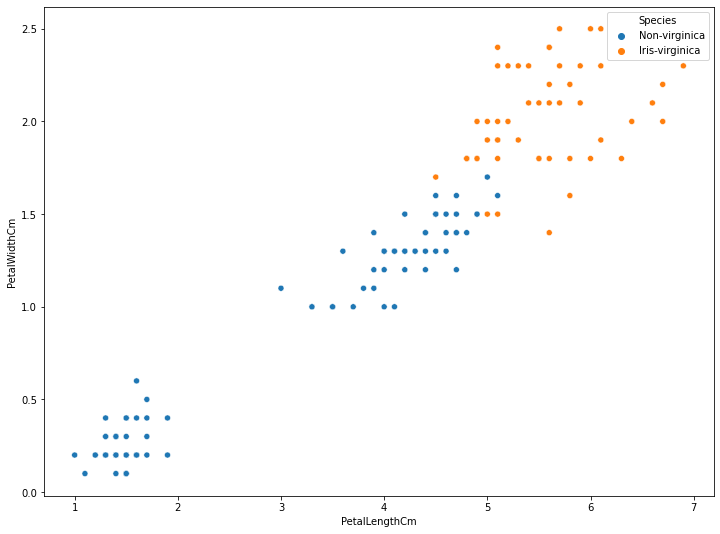

In [212]:
plt.figure(figsize=(12, 9))
sns.scatterplot(data=data,
                x="PetalLengthCm",
                y="PetalWidthCm",
                hue="Species")

plt.show()

### Split Input Output 

In [213]:
def split_input_output(data, output_col):
    X = data.drop(columns=output_col)
    y = data[output_col]
    
    return X, y

In [214]:
X, y = split_input_output(data=data,
                          output_col="Species")

In [215]:
X.head()

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [216]:
X.shape

(150, 2)

In [217]:
y.head()

0    Non-virginica
1    Non-virginica
2    Non-virginica
3    Non-virginica
4    Non-virginica
Name: Species, dtype: object

In [218]:
y.shape

(150,)

In [219]:
y.value_counts()

Non-virginica     100
Iris-virginica     50
Name: Species, dtype: int64

### Train Test Split 

In [220]:
from sklearn.model_selection import train_test_split

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

In [222]:
print(f"Train Data Shape: {X_train.shape, y_train.shape}")
print(f"Test Data Shape: {X_test.shape, y_test.shape}")

Train Data Shape: ((120, 2), (120,))
Test Data Shape: ((30, 2), (30,))


In [223]:
y_train.value_counts()

Non-virginica     80
Iris-virginica    40
Name: Species, dtype: int64

In [224]:
y_test.value_counts()

Non-virginica     20
Iris-virginica    10
Name: Species, dtype: int64

### Preprocessing

Apakah kita bisa Convert nya pake LabelEncoder?

Kalo binary gpp pake LabelEncoder, karena kalo gk kelas 1 ya hasilnya kelas lainnya 

Kalo multiclass pake OHE, karena kalo pake LabelEncoder nilai nya bisa bikin bias (karena ada urutannya)
Ex:
  - Prancis (0)
  - Indo (1)
  - Jepang (2)
ada yg nge prediksi kalo Indo > Jepang. Padahal semua nya setara

In [227]:
y_train.value_counts()

Non-virginica     80
Iris-virginica    40
Name: Species, dtype: int64

In [228]:
def convert_class(y_train, y_test, class_name):
    y_train = y_train.apply(lambda x: 1 if x == class_name else 0)
    y_test = y_test.apply(lambda x: 1 if x == class_name else 0)
    
    return y_train, y_test

In [229]:
y_train, y_test = convert_class(y_train=y_train,
                                y_test=y_test,
                                class_name="Iris-virginica")

In [233]:
y_train.value_counts()

0    80
1    40
Name: Species, dtype: int64

In [234]:
y_train.value_counts()

0    80
1    40
Name: Species, dtype: int64

In [235]:
y_test.value_counts()

0    20
1    10
Name: Species, dtype: int64

Coba bandingkan model yang pake di Scaling dan tanpa di Scaling

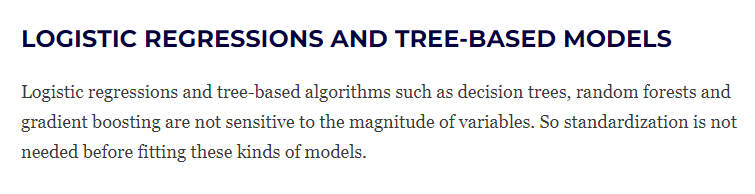

Setelah melakukan eksperimen menggunakan scaling dan tidak menggunakan scaling didapatkan hasil:
- Secara overall, bentuk dari Decision Boundary nya masih sama, cuma beda scale atau range data nya aja
- Apakah karena range data nya tidak begitu jauh sehingga tidak begitu berpengaruh
- Tetapi menariknya adalah hasil metrics accuracy tanpa di scaling jauh lebih bagus daripada yang menggunakan scaling 

In [122]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [123]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [124]:
X_train_scaled = pd.DataFrame(data = X_train_scaled, columns = X_train.columns, index = X_train.index)

In [125]:
X_train_scaled

,PetalLengthCm,PetalWidthCm
108,1.184342,0.807441
94,0.266322,0.148306
69,0.094193,-0.115349
131,1.528600,1.071096
119,0.725332,0.411960
...,...,...
82,0.094193,0.016478
103,1.069589,0.807441
72,0.667956,0.411960
93,-0.250065,-0.247176


In [126]:
X_test_scaled = pd.DataFrame(data = X_test_scaled, columns = X_test.columns, index = X_test.index)

In [127]:
X_test_scaled

,PetalLengthCm,PetalWidthCm
34,-1.282838,-1.433620
53,0.151569,0.148306
59,0.094193,0.280133
142,0.782708,0.939268
1,-1.340214,-1.301793
3,-1.282838,-1.301793
96,0.266322,0.148306
138,0.610579,0.807441
70,0.610579,0.807441
7,-1.282838,-1.301793


### Modelling with Logistic Regression 

In [128]:
from sklearn.linear_model import LogisticRegression

In [129]:
logreg = LogisticRegression()

In [130]:
logreg.fit(X_train_scaled, y_train)

LogisticRegression()

In [131]:
y_pred_train_proba = logreg.predict_proba(X_train_scaled)

Fungsi logistic di kasus ini cuma nge prediksi / nge hitung kelas 1 aja. Karena untuk dapetin kelas 0 tinggal 1 - proba_kelas_1

In [132]:
y_pred_train_proba

array([[1.30211492e-01, 8.69788508e-01],
       [8.96964741e-01, 1.03035259e-01],
       [9.65031127e-01, 3.49688733e-02],
       [3.02119889e-02, 9.69788011e-01],
       [5.78560971e-01, 4.21439029e-01],
       [1.99586712e-01, 8.00413288e-01],
       [9.99940849e-01, 5.91508592e-05],
       [9.99901742e-01, 9.82581691e-05],
       [9.99812511e-01, 1.87488871e-04],
       [8.06305484e-01, 1.93694516e-01],
       [7.41167890e-03, 9.92588321e-01],
       [9.99959096e-01, 4.09039619e-05],
       [9.72020927e-01, 2.79790725e-02],
       [9.99946024e-01, 5.39761215e-05],
       [2.38910686e-01, 7.61089314e-01],
       [9.99932052e-01, 6.79482420e-05],
       [2.11434111e-02, 9.78856589e-01],
       [1.01888239e-01, 8.98111761e-01],
       [6.75432713e-01, 3.24567287e-01],
       [8.62890507e-01, 1.37109493e-01],
       [9.99946024e-01, 5.39761215e-05],
       [3.74619226e-01, 6.25380774e-01],
       [2.38426569e-01, 7.61573431e-01],
       [9.99967507e-01, 3.24927456e-05],
       [8.516944

In [133]:
y_pred_train = logreg.predict(X_train_scaled)

In [134]:
y_pred_train

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1])

In [135]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [136]:
acc_train = accuracy_score(y_train, y_pred_train)
acc_train

0.975

Precision Recall, dll pelajari lagi

In [137]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        80
           1       1.00      0.93      0.96        40

    accuracy                           0.97       120
   macro avg       0.98      0.96      0.97       120
weighted avg       0.98      0.97      0.97       120



In [138]:
y_pred_test_proba = logreg.predict_proba(X_test_scaled)

In [139]:
y_pred_test_proba

array([[9.99967507e-01, 3.24927456e-05],
       [9.19920930e-01, 8.00790699e-02],
       [9.01237845e-01, 9.87621553e-02],
       [2.14615579e-01, 7.85384421e-01],
       [9.99959096e-01, 4.09039619e-05],
       [9.99953012e-01, 4.69876496e-05],
       [8.96964741e-01, 1.03035259e-01],
       [3.74619226e-01, 6.25380774e-01],
       [3.74619226e-01, 6.25380774e-01],
       [9.99953012e-01, 4.69876496e-05],
       [6.96285100e-02, 9.30371490e-01],
       [4.14180981e-02, 9.58581902e-01],
       [2.83240816e-01, 7.16759184e-01],
       [9.99959096e-01, 4.09039619e-05],
       [9.99763986e-01, 2.36013602e-04],
       [5.12337293e-03, 9.94876627e-01],
       [3.96302352e-01, 6.03697648e-01],
       [6.13176442e-02, 9.38682356e-01],
       [9.19920930e-01, 8.00790699e-02],
       [2.64720176e-02, 9.73527982e-01],
       [9.99870343e-01, 1.29657310e-04],
       [6.11953892e-01, 3.88046108e-01],
       [1.58930497e-01, 8.41069503e-01],
       [2.01374602e-02, 9.79862540e-01],
       [9.694204

In [140]:
y_pred_test = logreg.predict(X_test_scaled)

In [141]:
y_pred_test

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0])

In [142]:
acc_test = accuracy_score(y_test, y_pred_test)
acc_test

0.9

In [143]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        20
           1       0.77      1.00      0.87        10

    accuracy                           0.90        30
   macro avg       0.88      0.93      0.89        30
weighted avg       0.92      0.90      0.90        30



### Get Coefficient and Intercept

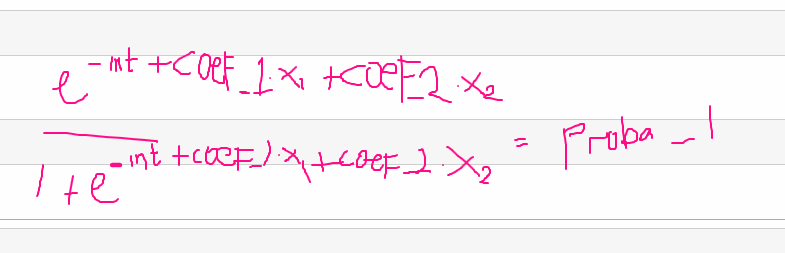

In [144]:
logreg.coef_

array([[2.41674703, 2.7982282 ]])

In [145]:
logreg.intercept_

array([-3.22256988])

In [146]:
print('intercept ', logreg.intercept_[0])
print('classes', logreg.classes_)
pd.DataFrame({'coeff': logreg.coef_[0]}, 
             index=X.columns)

intercept  -3.222569878915929
classes [0 1]


,coeff
PetalLengthCm,2.416747
PetalWidthCm,2.798228


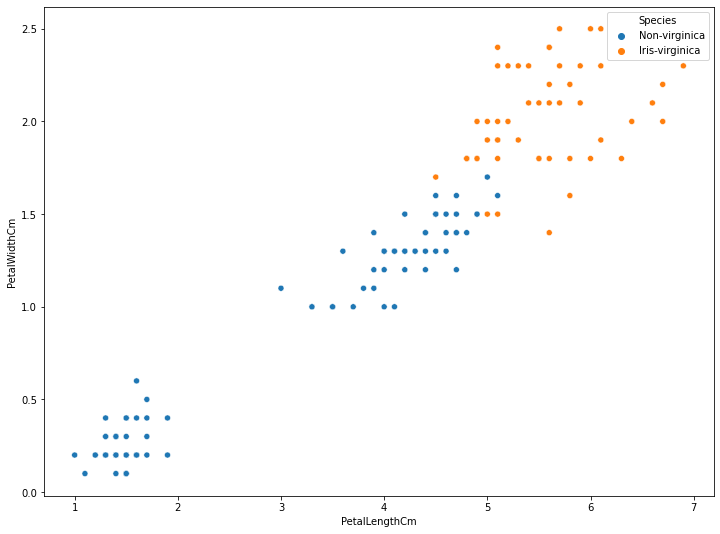

In [147]:
plt.figure(figsize=(12, 9))
sns.scatterplot(data=data,
                x="PetalLengthCm",
                y="PetalWidthCm",
                hue="Species")

plt.show()

Masih bingung untuk gimana cara menghitung / buat Decision Boundary nya. Butuh cari referensi lain

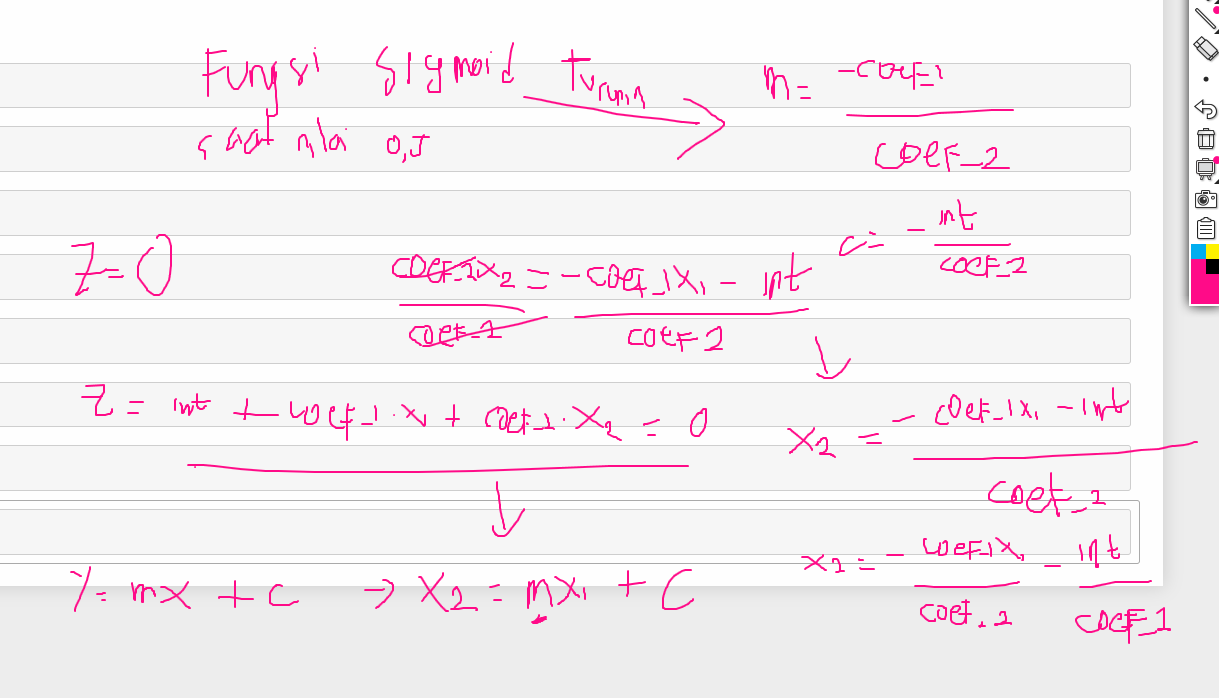

In [148]:
logreg.coef_[0]

array([2.41674703, 2.7982282 ])

In [149]:
logreg.intercept_

array([-3.22256988])

In [150]:
coef_1, coef_2 = logreg.coef_[0]

In [151]:
itc = logreg.intercept_[0]

In [152]:
m_boundary = -coef_1 / coef_2

In [153]:
m_boundary

-0.8636704600904437

In [154]:
c_boundary = -itc / coef_2

In [155]:
c_boundary

1.1516465608988882

In [156]:
print(m_boundary, c_boundary)

-0.8636704600904437 1.1516465608988882


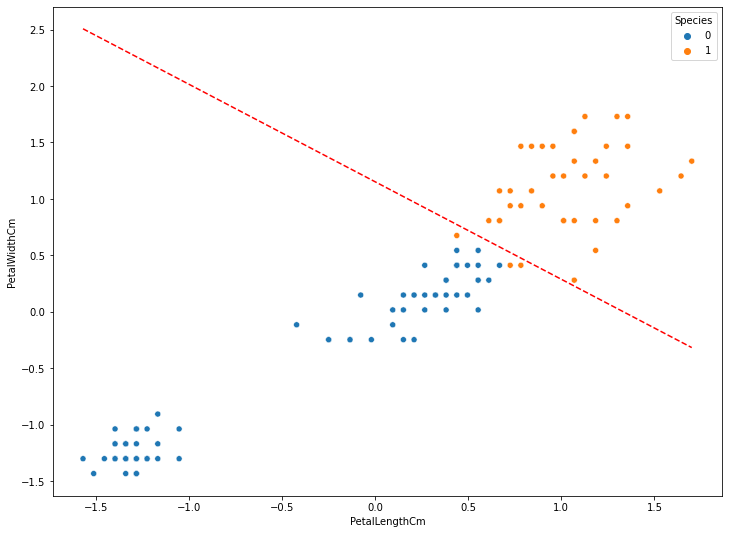

In [158]:
plt.figure(figsize=(12, 9))

data_scaled = X_train_scaled.copy()
data_scaled["Species"] = y_train

sns.scatterplot(data=data_scaled,
                x="PetalLengthCm",
                y="PetalWidthCm",
                hue="Species")


x_support = np.linspace(data_scaled["PetalLengthCm"].min(), 
                        data_scaled["PetalLengthCm"].max(), 101)
y_support = m_boundary*x_support + c_boundary

plt.plot(x_support, y_support, "--r")
# plt.set_ylim(-6, 6)

plt.show()

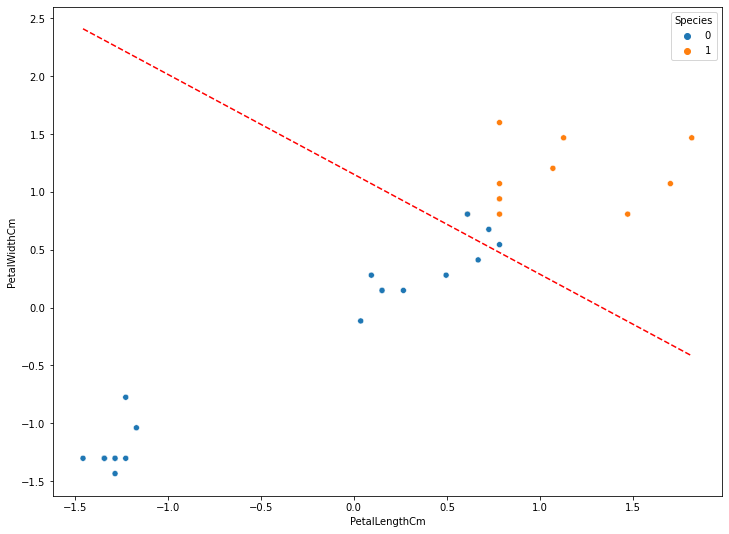

In [159]:
plt.figure(figsize=(12, 9))

data_scaled = X_test_scaled.copy()
data_scaled["Species"] = y_test

sns.scatterplot(data=data_scaled,
                x="PetalLengthCm",
                y="PetalWidthCm",
                hue="Species")


x_support = np.linspace(data_scaled["PetalLengthCm"].min(), 
                        data_scaled["PetalLengthCm"].max(), 101)
y_support = m_boundary*x_support + c_boundary

plt.plot(x_support, y_support, "--r")
# plt.set_ylim(-6, 6)

plt.show()

### Without Scaling

In [161]:
X, y = split_input_output(data=data,
                          output_col="Species")

### Train Test Split 

In [162]:
from sklearn.model_selection import train_test_split

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

In [164]:
print(f"Train Data Shape: {X_train.shape, y_train.shape}")
print(f"Test Data Shape: {X_test.shape, y_test.shape}")

Train Data Shape: ((120, 2), (120,))
Test Data Shape: ((30, 2), (30,))


In [165]:
y_train.value_counts()

Non-virginica     80
Iris-virginica    40
Name: Species, dtype: int64

In [166]:
y_test.value_counts()

Non-virginica     20
Iris-virginica    10
Name: Species, dtype: int64

### Preprocessing

In [167]:
y_train = y_train.apply(lambda x: 1 if x == "Iris-virginica" else 0)
y_test = y_test.apply(lambda x: 1 if x == "Iris-virginica" else 0)

In [168]:
y_train.value_counts()

0    80
1    40
Name: Species, dtype: int64

In [169]:
y_test.value_counts()

0    20
1    10
Name: Species, dtype: int64

### Modeling 

In [170]:
logreg2 = LogisticRegression()

In [171]:
logreg2.fit(X_train, y_train)

LogisticRegression()

In [172]:
y_pred_train_proba = logreg2.predict_proba(X_train)

In [173]:
y_pred_train_proba

array([[4.99149131e-02, 9.50085087e-01],
       [9.27157414e-01, 7.28425863e-02],
       [9.78127099e-01, 2.18729013e-02],
       [6.48517904e-03, 9.93514821e-01],
       [4.76443763e-01, 5.23556237e-01],
       [2.91712141e-01, 7.08287859e-01],
       [9.99995958e-01, 4.04230193e-06],
       [9.99993401e-01, 6.59915191e-06],
       [9.99985798e-01, 1.42018564e-05],
       [8.92466194e-01, 1.07533806e-01],
       [5.10763352e-03, 9.94892366e-01],
       [9.99996736e-01, 3.26413720e-06],
       [9.76749441e-01, 2.32505589e-02],
       [9.99994328e-01, 5.67240160e-06],
       [2.78970655e-01, 7.21029345e-01],
       [9.99994671e-01, 5.32878252e-06],
       [2.46858378e-02, 9.75314162e-01],
       [2.93449337e-02, 9.70655066e-01],
       [6.75821465e-01, 3.24178535e-01],
       [7.98362850e-01, 2.01637150e-01],
       [9.99994328e-01, 5.67240160e-06],
       [4.54344008e-01, 5.45655992e-01],
       [7.45650126e-02, 9.25434987e-01],
       [9.99996525e-01, 3.47462098e-06],
       [8.474698

In [174]:
y_pred_train = logreg2.predict(X_train)

In [175]:
y_pred_train

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1])

In [176]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [177]:
acc_train = accuracy_score(y_train, y_pred_train)
acc_train

0.9916666666666667

Precision Recall, dll pelajari lagi

In [178]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        80
           1       1.00      0.97      0.99        40

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [179]:
y_pred_test_proba = logreg2.predict_proba(X_test)

In [180]:
y_pred_test_proba

array([[9.99996525e-01, 3.47462098e-06],
       [9.56745748e-01, 4.32542525e-02],
       [9.59259239e-01, 4.07407610e-02],
       [2.26902809e-01, 7.73097191e-01],
       [9.99996736e-01, 3.26413720e-06],
       [9.99995697e-01, 4.30296447e-06],
       [9.27157414e-01, 7.28425863e-02],
       [4.54344008e-01, 5.45655992e-01],
       [4.54344008e-01, 5.45655992e-01],
       [9.99995697e-01, 4.30296447e-06],
       [1.30249174e-02, 9.86975083e-01],
       [9.15394774e-02, 9.08460523e-01],
       [2.66576238e-01, 7.33423762e-01],
       [9.99996736e-01, 3.26413720e-06],
       [9.99986658e-01, 1.33415524e-05],
       [8.62564892e-04, 9.99137435e-01],
       [3.72400112e-01, 6.27599888e-01],
       [4.58663920e-02, 9.54133608e-01],
       [9.56745748e-01, 4.32542525e-02],
       [2.32251582e-02, 9.76774842e-01],
       [9.99988532e-01, 1.14679456e-05],
       [5.45378541e-01, 4.54621459e-01],
       [1.91591403e-01, 8.08408597e-01],
       [2.84126995e-03, 9.97158730e-01],
       [9.833196

In [181]:
y_pred_test = logreg2.predict(X_test)

In [182]:
y_pred_test

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0])

In [183]:
acc_test = accuracy_score(y_test, y_pred_test)
acc_test

0.9

In [185]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        20
           1       0.77      1.00      0.87        10

    accuracy                           0.90        30
   macro avg       0.88      0.93      0.89        30
weighted avg       0.92      0.90      0.90        30



### Get Coefficient and Intercept

In [186]:
logreg2.coef_

array([[2.76309764, 2.13819621]])

In [187]:
logreg2.intercept_

array([-16.92848776])

In [188]:
print('intercept ', logreg2.intercept_[0])
print('classes', logreg2.classes_)
pd.DataFrame({'coeff': logreg2.coef_[0]}, 
             index=X.columns)

intercept  -16.928487760446615
classes [0 1]


,coeff
PetalLengthCm,2.763098
PetalWidthCm,2.138196


In [189]:
logreg2.coef_[0]

array([2.76309764, 2.13819621])

In [190]:
logreg2.intercept_

array([-16.92848776])

In [191]:
coef_1, coef_2 = logreg2.coef_[0]

In [192]:
itc = logreg2.intercept_[0]

In [193]:
m_boundary = -coef_1 / coef_2

In [194]:
m_boundary

-1.292256354401336

In [195]:
c_boundary = -itc / coef_2

In [196]:
c_boundary

7.917181631264572

In [197]:
print(m_boundary, c_boundary)

-1.292256354401336 7.917181631264572


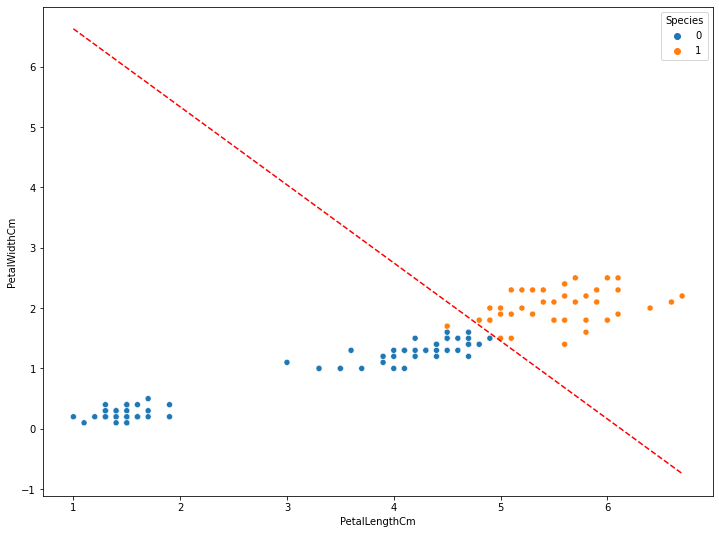

In [198]:
plt.figure(figsize=(12, 9))

data_scaled = X_train.copy()
data_scaled["Species"] = y_train

sns.scatterplot(data=data_scaled,
                x="PetalLengthCm",
                y="PetalWidthCm",
                hue="Species")


x_support = np.linspace(data_scaled["PetalLengthCm"].min(), 
                        data_scaled["PetalLengthCm"].max(), 101)
y_support = m_boundary*x_support + c_boundary

plt.plot(x_support, y_support, "--r")
# plt.set_ylim(-6, 6)

plt.show()

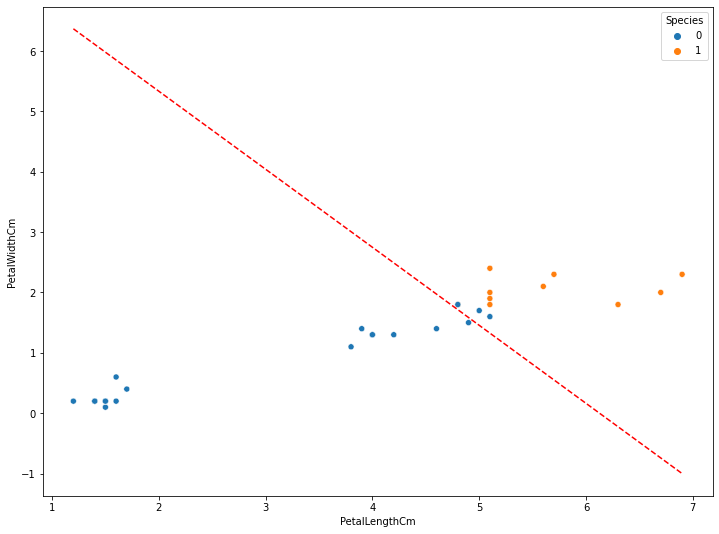

In [199]:
plt.figure(figsize=(12, 9))

data_scaled = X_test.copy()
data_scaled["Species"] = y_test

sns.scatterplot(data=data_scaled,
                x="PetalLengthCm",
                y="PetalWidthCm",
                hue="Species")


x_support = np.linspace(data_scaled["PetalLengthCm"].min(), 
                        data_scaled["PetalLengthCm"].max(), 101)
y_support = m_boundary*x_support + c_boundary

plt.plot(x_support, y_support, "--r")
# plt.set_ylim(-6, 6)

plt.show()